In [1]:
import h5py # for working with HDF5 (Hierarchical Data Format) files
import numpy as np
import sklearn.svm
import matplotlib.pyplot as plt
import pandas as pd







In [2]:
path = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/animal3.h5"

In [3]:
with (h5py.File(path, 'r')) as f:
    traces = np.array(f['traces/animal3learnday11/deconvolved'])

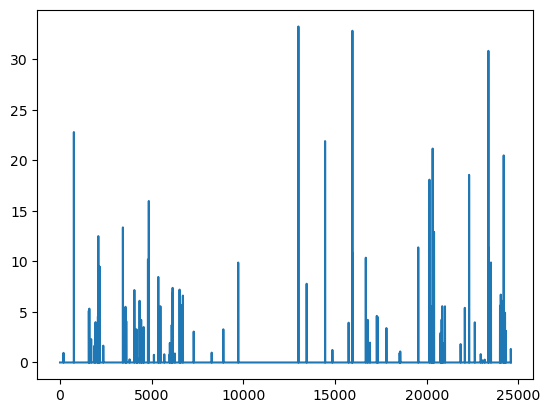

In [4]:
# traces[50]
plt.plot(traces[50])

In [5]:
# paths to videos
num_of_videos = 1

bonsai_data = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/data/tmaze_2021-10-28T18_13_23.csv"
# paths to videos
behavior_paths = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/data/20211028_181307_animal3learnday11.h5"

bonsai_data = pd.read_csv(bonsai_data, header=None)

df_behavior = pd.read_hdf(behavior_paths, 'per_frame')

In [6]:
# Adding column names
bonsai_data = bonsai_data.rename(columns={
    0: 'Time', 1: 'Trial_Number',
    2: 'Reward', 3: 'Frame_Number', 4: 'Central_Zone',
    5: 'L_Zone', 6: 'R_Zone', 7: 'Calcium_frame'})

In [7]:
df_aligned = df_behavior.loc[bonsai_data.groupby('Calcium_frame').first()[1:].Frame_Number].reset_index()

In [8]:
df_new_annotations = df_aligned[['state_id', 'state_name']]

df_unique_states = df_new_annotations[['state_id', 'state_name']].drop_duplicates(subset='state_id').set_index('state_id')['state_name'].sort_index()

In [9]:
df_unique_states

state_id
0          initReward
1            initLeft
2           initRight
3         mainRunLeft
4        mainRunRight
5          mainReturn
6           mainOther
7      turnMainToLeft
8     turnMainToRight
9      turnLeftToMain
10    turnRightToMain
11    turnLeftToRight
12    turnRightToLeft
13            leftRun
14         leftReturn
15         leftReward
16           leftLeft
17          leftRight
18          leftOther
19           rightRun
20        rightReturn
21        rightReward
22          rightLeft
23         rightRight
24         rightOther
Name: state_name, dtype: object

In [10]:
# state id mapping for main corridor, left corridor, right corridor
state_id_map = {
    1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0,
    9: 1, 11: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1,
    10: 2, 12: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2,
}

In [11]:
#     # state_id map for forward, left turn, right turn, 
#     state_id_map = {
#         #forward
#         0: 0, 3: 0, 4: 0, 5: 0, 6: 0, 13: 0, 14: 0, 15: 0, 19: 0, 20: 0, 21: 0, 

#         #left
#         1: 1, 7: 1, 9: 1, 11: 1, 16: 1, 18: 1, 22: 1, 

#         #right
#         2: 2, 8: 2, 10: 2, 12: 2, 17: 2, 23: 2, 24: 2
#     }


df_new_annotations.loc[:, 'state_id'] = df_new_annotations.loc[:, 'state_id'].replace(state_id_map)
df_new_annotations = df_new_annotations.loc[:, 'state_id']    

# return df_new_annotations, df_unique_states

/tmp/ipykernel_1023482/340281171.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_annotations.loc[:, 'state_id'] = df_new_annotations.loc[:, 'state_id'].replace(state_id_map)


In [12]:
df_new_annotations

0        0
1        0
2        0
3        0
4        0
        ..
24584    1
24585    1
24586    1
24587    1
24588    1
Name: state_id, Length: 24589, dtype: int64

In [13]:
mySVC = sklearn.svm.LinearSVC()

In [14]:
mySVC.fit(traces.T, df_new_annotations)

/home/dmc/anaconda3/envs/new_kostas_env/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [15]:
mySVC.predict(traces.T)

array([0, 0, 0, ..., 1, 1, 1])